# **Knowledge Based Topic Retrieval for Recommendations and Tourism Promotions**

Technical Steps
1. Get data from Tripadvisor✅
2. Preparing Env✅
3. Data pre-processing
<ul>
  <li>Case Folding✅</li>
  <li>Tokenization✅</li>
  <li>Remove Slang✅</li>
  <li>Stem✅</li>
  <li>Stopword Removal✅</li>
  <li>Rejoin✅</li>
</ul>
4. Feature Engineering
<ul>
  <li>Vectorization✅</li>
  <li>Normalization Using MinMaxScaler✅</li>
  <li>Balancing with SMOTE✅</li>
</ul>
5. Review Stars Classification
<ul>
  <li>Random Forest</li>
  <li>Decision Tree</li>
  <li>Logistic Regression</li>
  <li>K-NN</li>
  <li>Support Vector Machine</li>
</ul>
6. Clustering and Elbow Method
7. Modeling with LDA, NMF, K-Means Clustering

## 1. Get Data from Tripadvisor

Data gathered by using Webscapper.io from top 30 Hotel in Tripadvisor

## 2. Preparing Environment




In [ ]:
# 2.1. Mount Google Drive and default dataset path
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Python/Dataset/'

In [ ]:
# 2.2. Install Sastrawi
!pip install Sastrawi
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install nltk
!pip install glob
!pip install os
!pip install sys
!pip install wordcloud
!pip install --upgrade pillow
!pip install sklearn
!pip install imblearn

In [1]:
# 2.3. Import Installed Library
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import glob
import os
import sys
from ast import literal_eval
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tinob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tinob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
path = os.getcwd()+'/Dataset/'

In [ ]:
# 2.4. Import Data
slang_df = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')


# Combine All Hotel CSV from Google Drive 'Dataset' folder
hotel_csv = os.path.join(path, '*.csv')
joined_review = glob.glob(hotel_csv)

hotel_df = pd.concat(map(pd.read_csv, joined_review), ignore_index=True)

In [ ]:
hotel_df.info()

In [ ]:
# Drop Unnecessary Column
hotel_df = hotel_df.drop(hotel_df.columns[0], axis = 1)

In [ ]:
hotel_df.head()

In [ ]:
slang_df.head()

## 3. Data Preprocessing

In [ ]:
# 3.1. Case Folding
hotel_df['review'] = hotel_df['review'].str.lower()

In [ ]:
# 3.2. Tokenization
def tokenizeWords(s, remove_punctuation=True):
  if remove_punctuation == True:
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|S+')
    clean_words = tokenizer.tokenize(s)
  else:
    clean_words = nltk.word_tokenize(s)
  return clean_words

hotel_df['tokenized'] = hotel_df['review'].apply(tokenizeWords)
tokenized = pd.DataFrame({'review' : hotel_df['review'], 'tokenized' : hotel_df['review'].apply(tokenizeWords)})

In [ ]:
# 3.3. Remove Slang
# Remove trailing whitespace
slang_df['slang'] = slang_df['slang'].apply(lambda x:x.strip())
slang_df['formal'] = slang_df['formal'].apply(lambda x:x.strip())

In [ ]:
# Transform into key value pairs in a dict
slang_dict = {}
for idx, row in slang_df.iterrows():
  slang_dict.update({row['slang']: row['formal']})

def replaceSlang(tokens):
  for i, word in enumerate(tokens):
    try:
      tokens[i] = slang_dict[word]
    except:
      KeyError
  return tokens

no_slang = pd.DataFrame({'review' : hotel_df['review'], 'no_slang' : tokenized['tokenized'].apply(replaceSlang)})
hotel_df = pd.merge(hotel_df, no_slang, on='review')

In [ ]:
hotel_df.head(20)

In [ ]:
# 3.4. Stem
def stemWords(tokens):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    return [stemmer.stem(t) for t in tokens]

hotel_df['stemmed'] = hotel_df['no_slang'].apply(stemWords)

**Proses Stem memakan waktu yang sangat lama. Untuk memangkas waktu, peneliti sudah membuat dataset dimana proses stem telah selesai.**

In [2]:
hotel_df = pd.read_csv('stemmed_review.csv')
hotel_df = hotel_df.drop(hotel_df.columns[0], axis = 1)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21683 entries, 0 to 21682
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     21683 non-null  object
 1   stars      21683 non-null  int64 
 2   tokenized  21683 non-null  object
 3   no_slang   21683 non-null  object
 4   stemmed    21683 non-null  object
dtypes: int64(1), object(4)
memory usage: 847.1+ KB


In [3]:
hotel_df.head(10)

,review,stars,tokenized,no_slang,stemmed
0,"liburan keluarga yg nyaman, kolam renang yg ba...",5,"['liburan', 'keluarga', 'yg', 'nyaman', 'kolam...","['liburan', 'keluarga', 'yang', 'nyaman', 'kol...","['libur', 'keluarga', 'yang', 'nyaman', 'kolam..."
1,hotelnya bagus banget dan pelayanannya sangat ...,5,"['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotel', 'bagus', 'banget', 'dan', 'layan', '..."
2,saya menginap di adiwana bisma bersama pasanga...,5,"['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'inap', 'di', 'adiwana', 'bisma', 'sa..."
3,"hotelnya bagus banget, bersih dan lengkap fasi...",5,"['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotel', 'bagus', 'banget', 'bersih', 'dan', ..."
4,weekend di adiwana bisma stay selama two night...,5,"['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ..."
5,stay one night bareng keluarga sangat menyenan...,5,"['stay', 'one', 'night', 'bareng', 'keluarga',...","['stay', 'one', 'night', 'bareng', 'keluarga',...","['stay', 'one', 'night', 'bareng', 'keluarga',..."
6,daycation di adiwana bisma sangat menyenangkan...,5,"['daycation', 'di', 'adiwana', 'bisma', 'sanga...","['daycation', 'di', 'adiwana', 'bisma', 'sanga...","['daycation', 'di', 'adiwana', 'bisma', 'sanga..."
7,"hotelnya masih terbilang baru, ada restaurantn...",5,"['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","['hotel', 'masih', 'bilang', 'baru', 'ada', 'r..."
8,thank you so much buat pelayanan yang ramah da...,5,"['thank', 'you', 'so', 'much', 'buat', 'pelaya...","['thank', 'you', 'sok', 'much', 'buat', 'pelay...","['thank', 'you', 'sok', 'much', 'buat', 'layan..."
9,"kamar hotel yang besar, bersih dan mewah, ling...",5,"['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","['kamar', 'hotel', 'yang', 'besar', 'bersih', ..."


In [4]:
# Fixing 'stemmed' column structure after converting to CSV file
hotel_df['stemmed'] = hotel_df['stemmed'].apply(literal_eval)

In [5]:
# 3.5. Stopword Removal
nltk_lib = stopwords.words('indonesian')

# Additional words from GitHub for NLTK Stopwords 
add_words = open('add_stopwords.txt', 'r')
data = add_words.read()
list_add_words = data.split('\n')
add_words.close()

custom_words = [
    'hotel',
    'resort',
    'hotel',
    'inap',
    'stay',
    'villa',
    'resor',
    'banget',
    'night',
    'bal',
    'n',
    'ju',
    'two',
    'libur',
    'staff',
    'staf',
    'dtype',
    'Name',
    'object',
    'Length',
    'bagus',
    'udaya',
    'nya',
    'final',
    'nginep',
    'kalo',
    'mulaidari',
    'istri'
    
]

stops = nltk_lib + list_add_words + custom_words

In [6]:
def removeStopWords(tokens):
    return [t for t in tokens if t not in stops]

In [7]:
hotel_df['cleaned'] = hotel_df['stemmed'].apply(removeStopWords)

In [8]:
hotel_df.head(30)

,review,stars,tokenized,no_slang,stemmed,cleaned
0,"liburan keluarga yg nyaman, kolam renang yg ba...",5,"['liburan', 'keluarga', 'yg', 'nyaman', 'kolam...","['liburan', 'keluarga', 'yang', 'nyaman', 'kol...","[libur, keluarga, yang, nyaman, kolam, renang,...","[keluarga, nyaman, kolam, renang, kamar, bersi..."
1,hotelnya bagus banget dan pelayanannya sangat ...,5,"['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","[hotel, bagus, banget, dan, layan, sangat, bai...","[layan, suka, tingkat, layan, unjung]"
2,saya menginap di adiwana bisma bersama pasanga...,5,"['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'menginap', 'di', 'adiwana', 'bisma',...","[saya, inap, di, adiwana, bisma, sama, pasang,...","[adiwana, bisma, pasang, kamar, bersih, luas, ..."
3,"hotelnya bagus banget, bersih dan lengkap fasi...",5,"['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","[hotel, bagus, banget, bersih, dan, lengkap, f...","[bersih, lengkap, fasilitas, poolnya, cantik, ..."
4,weekend di adiwana bisma stay selama two night...,5,"['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","[weekend, di, adiwana, bisma, stay, lama, two,...","[weekend, adiwana, bisma, senang, puas, layan,..."
5,stay one night bareng keluarga sangat menyenan...,5,"['stay', 'one', 'night', 'bareng', 'keluarga',...","['stay', 'one', 'night', 'bareng', 'keluarga',...","[stay, one, night, bareng, keluarga, sangat, s...","[one, bareng, keluarga, senang, kamar, luas, v..."
6,daycation di adiwana bisma sangat menyenangkan...,5,"['daycation', 'di', 'adiwana', 'bisma', 'sanga...","['daycation', 'di', 'adiwana', 'bisma', 'sanga...","[daycation, di, adiwana, bisma, sangat, senang...","[daycation, adiwana, bisma, senang, staffnya, ..."
7,"hotelnya masih terbilang baru, ada restaurantn...",5,"['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","['hotelnya', 'masih', 'terbilang', 'baru', 'ad...","[hotel, masih, bilang, baru, ada, restaurantny...","[bilang, restaurantnya, roomnya, luas, bersih,..."
8,thank you so much buat pelayanan yang ramah da...,5,"['thank', 'you', 'so', 'much', 'buat', 'pelaya...","['thank', 'you', 'sok', 'much', 'buat', 'pelay...","[thank, you, sok, much, buat, layan, yang, ram...","[thank, you, sok, much, layan, ramah, kamar, b..."
9,"kamar hotel yang besar, bersih dan mewah, ling...",5,"['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","['kamar', 'hotel', 'yang', 'besar', 'bersih', ...","[kamar, hotel, yang, besar, bersih, dan, mewah...","[kamar, bersih, mewah, lingkung, desa, asri, s..."


In [9]:
# 3.6. Rejoin Token

def rejoinToken(token):
    return (' '.join(t for t in token))


hotel_df['final'] = hotel_df['cleaned'].apply(rejoinToken)

In [10]:
hotel_df

,review,stars,tokenized,no_slang,stemmed,cleaned,final
0,"liburan keluarga yg nyaman, kolam renang yg ba...",5,"['liburan', 'keluarga', 'yg', 'nyaman', 'kolam...","['liburan', 'keluarga', 'yang', 'nyaman', 'kol...","[libur, keluarga, yang, nyaman, kolam, renang,...","[keluarga, nyaman, kolam, renang, kamar, bersi...",keluarga nyaman kolam renang kamar bersih pand...
1,hotelnya bagus banget dan pelayanannya sangat ...,5,"['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","['hotelnya', 'bagus', 'banget', 'dan', 'pelaya...","[hotel, bagus, banget, dan, layan, sangat, bai...","[layan, suka, tingkat, layan, unjung]",layan suka tingkat layan unjung
2,saya menginap di adiwana bisma bersama pasanga...,5,"['saya', 'menginap', 'di', 'adiwana', 'bisma',...","['saya', 'menginap', 'di', 'adiwana', 'bisma',...","[saya, inap, di, adiwana, bisma, sama, pasang,...","[adiwana, bisma, pasang, kamar, bersih, luas, ...",adiwana bisma pasang kamar bersih luas kasih f...
3,"hotelnya bagus banget, bersih dan lengkap fasi...",5,"['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","['hotelnya', 'bagus', 'banget', 'bersih', 'dan...","[hotel, bagus, banget, bersih, dan, lengkap, f...","[bersih, lengkap, fasilitas, poolnya, cantik, ...",bersih lengkap fasilitas poolnya cantik pandan...
4,weekend di adiwana bisma stay selama two night...,5,"['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","['weekend', 'di', 'adiwana', 'bisma', 'stay', ...","[weekend, di, adiwana, bisma, stay, lama, two,...","[weekend, adiwana, bisma, senang, puas, layan,...",weekend adiwana bisma senang puas layan recept...
...,...,...,...,...,...,...,...
21678,villa pribadi yang menakjubkan dengan kolam re...,5,"['villa', 'pribadi', 'yang', 'menakjubkan', 'd...","['villa', 'pribadi', 'yang', 'menakjubkan', 'd...","[villa, pribadi, yang, takjub, dengan, kolam, ...","[pribadi, takjub, kolam, renang, ubud, damai, ...",pribadi takjub kolam renang ubud damai layak t...
21679,"hotel terbaik di bali untuk bulan madu anda, c...",5,"['hotel', 'terbaik', 'di', 'bali', 'untuk', 'b...","['hotel', 'terbaik', 'di', 'bali', 'untuk', 'b...","[hotel, baik, di, bal, untuk, bulan, madu, and...","[madu, cuaca, sempurna, fasilitas, pandang, in...",madu cuaca sempurna fasilitas pandang indah ko...
21680,udaya resort and spa adalah tempat yang cocok ...,4,"['udaya', 'resort', 'and', 'spa', 'adalah', 't...","['udaya', 'resort', 'and', 'spa', 'adalah', 't...","[udaya, resort, and, spa, adalah, tempat, yang...","[and, spa, cocok, santa, keluarga, buah, kolam...",and spa cocok santa keluarga buah kolam renang...
21681,resort yang luar biasa dengan layanan premium ...,5,"['resort', 'yang', 'luar', 'biasa', 'dengan', ...","['resort', 'yang', 'luar', 'biasa', 'dengan', ...","[resort, yang, luar, biasa, dengan, layan, pre...","[layan, premium, properti, bisnis, temu, kulin...",layan premium properti bisnis temu kuliner lez...


## Word Cloud Viz

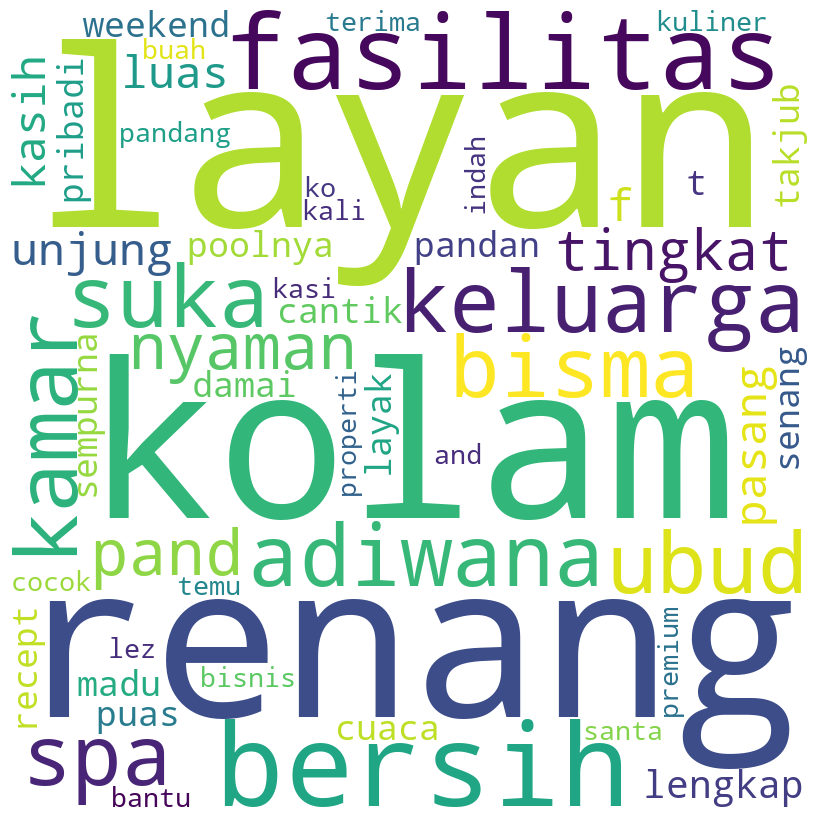

In [12]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stops,
                min_font_size = 10).generate(str(hotel_df['final']))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [12]:
contain_values = hotel_df[hotel_df['final'].str.contains('mulaidari')]
print(contain_values)

Empty DataFrame
Columns: [review, stars, tokenized, no_slang, stemmed, cleaned, final]
Index: []


## 4. Feature Engineering




In [13]:
## 4.1. Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
final_text = hotel_df.copy()
final_text = final_text[['final', 'stars']]

In [14]:
final_text = final_text.loc[:5000, :]

In [15]:
final_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21683 entries, 0 to 21682
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   final   21683 non-null  object
 1   stars   21683 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 338.9+ KB


In [16]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(final_text['final'])

In [17]:
## 4.2. Normalization
from sklearn.preprocessing import MaxAbsScaler
scaling = MaxAbsScaler()

features_scaled = scaling.fit_transform(features)

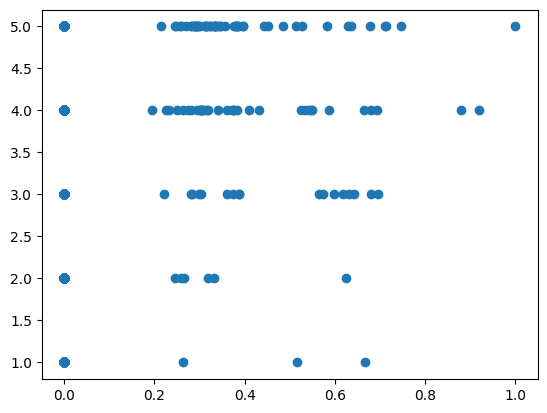

In [18]:
plt.scatter(features_scaled[:, 0].toarray(), final_text['stars'])

In [19]:
## 4.3. Balancing with SMOTE
final_text.groupby(['stars'])['stars'].count()

stars
1      204
2      369
3     1193
4     4625
5    15292
Name: stars, dtype: int64

In [20]:
x = final_text['stars'].sort_values().unique()
y = final_text.groupby(['stars'])['stars'].count()

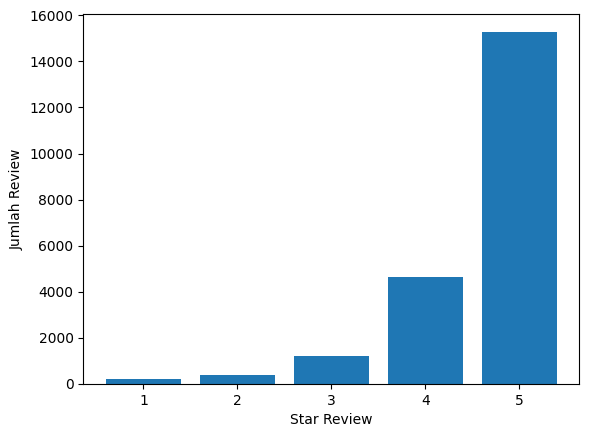

In [21]:
plt.bar(x, y)
plt.ylabel('Jumlah Review')
plt.xlabel('Star Review')

plt.show()

In [22]:
# Spliting Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score, balanced_accuracy_score
from sklearn.datasets import make_classification

X = features_scaled
y = final_text['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
y_train.value_counts()

5    12235
4     3675
3      975
2      298
1      163
Name: stars, dtype: int64

In [61]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()

X_res, y_res = sm.fit_resample(X_train, y_train)

In [62]:
y_res.value_counts()

1    12235
2    12235
3    12234
4    11326
5      214
Name: stars, dtype: int64

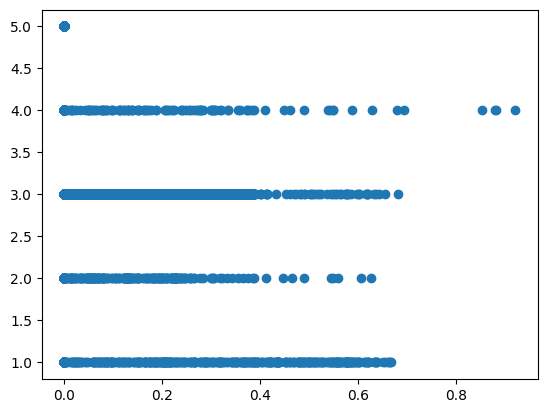

In [90]:
plt.scatter(X_res[:, 0].toarray(), y_res)

---

## 6. Review Stars Classification



In [25]:
# Import Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [27]:
clf_model = {
    'rfc' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
        }
    },
    
    'dts' : {
        'model' : tree.DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random']
        }
    },
    
    'lor' : {
        'model' : LogisticRegression(),
        'params' : {
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'C' : [x for x in np.linspace(0, 1, num = 4)],
        }
    },
    
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [x for x in range(1,11)],
            'weights' : ['uniform', 'distance'],
        }
    },
    
    'svm' : {
        'model' : SVC(),
        'params' : {
            'C' : [x for x in np.linspace(0, 1, num = 4)],
            'gamma' : ['scale', 'auto']
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf

with tf.device('/device:GPU:0'):

    scores = []

    for model_name, mp in model_params.items():
        clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,)
        clf.fit(X_res, y_res)
        scores.append({
            'model' : model_name,
            'best_score' : clf.best_score_,
            'best_params' : clf.best_params_,
        })

In [ ]:
score_result = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
score_result

In [90]:
clf_model = {
    'rfc' : RandomForestClassifier(),
    'dts' : tree.DecisionTreeClassifier(),
    'lor' : LogisticRegression(),
    'knn' : KNeighborsClassifier(),
    'svm' : SVC(),
}

In [91]:
start_time = time.time()

scores = []
for model_name in clf_model:
    clf = clf_model[model_name]
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    scores.append({
        'model' : model_name,
        'accuracy' : round(accuracy_score(y_test, y_pred), 2),
        'balance_accuracy' : balanced_accuracy_score(y_test, y_pred)
    })
    
print((time.time() - start_time) / 60)

C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


4.52605437040329


In [38]:
df_without_tuning = pd.DataFrame(scores)
df_without_tuning

NameError: name 'scores' is not defined

In [34]:
lor = LogisticRegression(solver='lbfgs', random_state=29, max_iter=600, C=0.25)
lor.fit(X_train, y_train)

y_pred = lor.predict(X_test)

In [35]:
lor.score(X_test, y_test)

0.7251556375374683

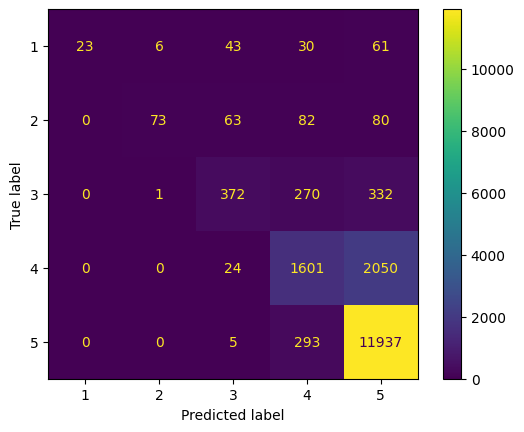

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lor, X_train, y_train)
plt.show()

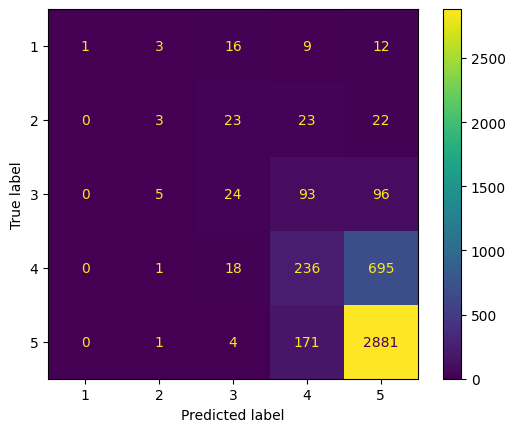

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [28]:
lor_tuned = RandomizedSearchCV(LogisticRegression(), {
    'C' : [x for x in np.linspace(1e-9, 1, 5)],
    'random_state' : [x for x in range(1, 43, 7)],
    'solver' : ['lbfgs', 'saga', 'newton_cg','sag'],
    'max_iter' : [x for x in range(100, 1000, 100)]
})

lor_tuned.fit(X_train, y_train)

C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\tinob\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\tinob\anaconda3\

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1e-09, 0.25000000075,
                                              0.5000000005, 0.75000000025,
                                              1.0],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900],
                                        'random_state': [1, 8, 15, 22, 29, 36],
                                        'solver': ['lbfgs', 'saga', 'newton_cg',
                                                   'sag']})

In [29]:
lor_df = pd.DataFrame(lor_tuned.cv_results_)
lor_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_random_state,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.623355,0.086494,0.001796,0.000399,lbfgs,29,600,0.25,"{'solver': 'lbfgs', 'random_state': 29, 'max_i...",0.731700,0.729029,0.731911,0.731911,0.728452,0.730601,0.001532,1
8,1.310776,0.047486,0.001392,0.000483,sag,1,600,0.25,"{'solver': 'sag', 'random_state': 1, 'max_iter...",0.731700,0.729029,0.731911,0.731911,0.728452,0.730601,0.001532,1
7,2.204395,0.076996,0.001780,0.000393,sag,1,900,0.75,"{'solver': 'sag', 'random_state': 1, 'max_iter...",0.722190,0.725281,0.727875,0.724416,0.725569,0.725066,0.001838,3
9,2.563185,0.125296,0.002193,0.000400,lbfgs,8,200,0.75,"{'solver': 'lbfgs', 'random_state': 8, 'max_it...",0.721902,0.724993,0.727875,0.724416,0.725569,0.724951,0.001925,4
2,2.819910,0.129168,0.001802,0.000755,lbfgs,15,200,1.0,"{'solver': 'lbfgs', 'random_state': 15, 'max_i...",0.721326,0.724416,0.722687,0.723840,0.722398,0.722933,0.001091,5
0,1.785790,0.040578,0.001994,0.000002,sag,1,100,1.0,"{'solver': 'sag', 'random_state': 1, 'max_iter...",0.721326,0.724416,0.722687,0.723840,0.722110,0.722876,0.001125,6
1,2.544968,0.121525,0.001797,0.000400,sag,29,200,1.0,"{'solver': 'sag', 'random_state': 29, 'max_ite...",0.721326,0.724416,0.722687,0.723840,0.722110,0.722876,0.001125,6
5,2.578806,0.148636,0.001797,0.000400,sag,15,300,1.0,"{'solver': 'sag', 'random_state': 15, 'max_ite...",0.721326,0.724416,0.722687,0.723840,0.722110,0.722876,0.001125,6
3,0.002579,0.000478,0.000000,0.000000,newton_cg,22,100,1.0,"{'solver': 'newton_cg', 'random_state': 22, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,0.002594,0.000489,0.000000,0.000000,newton_cg,36,400,0.0,"{'solver': 'newton_cg', 'random_state': 36, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
